<a href="https://colab.research.google.com/github/rabindramahato3/AppliedAI/blob/main/4_Implement_RandomSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# import numpy
# from tqdm import tqdm
# import numpy as np
# from sklearn.metrics.pairwise import euclidean_distances


# x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
# X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# # del X_train,X_test

In [ ]:
# X_train.shape

In [ ]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# colors = {0:'red', 1:'blue'}
# plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
# plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, Y_train, Y_test = train_test_split(x,y,stratify=y,random_state=42)


In [2]:
X_train.shape

(7500, 2)

In [3]:
X_test.shape

(2500, 2)

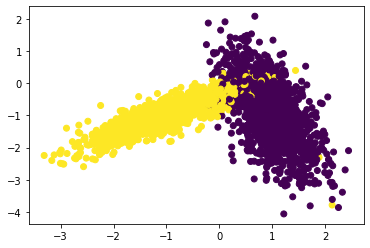

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
# colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=Y_test)
plt.show()

In [5]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
  ''''
    x_train: its numpy array of shape, (n,d)
    y_train: its numpy array of shape, (n,) or (n,1)
    classifier: its typically KNeighborsClassifier()
    param_range: its a tuple like (a,b) a < b
    folds: an integer, represents number of folds 
    we need to divide the data and test our model
  '''
  # 1. generate 10 unique values(uniform random distribution) 
  #       in the given range "param_range" and store them as "params" 
  a = param_range[0]
  b = param_range[1]
  unique_values = sorted(random.sample(range(a, b), 10))
  # unique_values = [i for i in range(3, 50) if i%2!=0]
  params = {'n_neighbors': unique_values }
  # print(params)

  # 2. divide numbers ranging from  0 to len(X_train) into groups= folds
  step_size = len(x_train)//folds
  groups = []
  for i in range(folds - 1):
    groups.append((i*step_size, (i+1)*step_size))
  groups.append(((folds-1)*step_size, len(x_train)))
  # print(groups)

  # 3. for each hyperparameter that we generated in step 1:
  # and using the above groups we have created in step 2 we will do cross-validation

  train_scores = []
  cv_scores = []

  for k in tqdm(params['n_neighbors']):
    trainscores_folds = []
    cvscores_folds = []
    
    for i in range(len(groups)):
      # cv_indices will have the indices of the range set in a group
      cv_indices = list(set(list(range(groups[i][0], groups[i][1]))))

      # And the whole rest of the indices of the dataset will be the train_indices
      train_indices = list(set(list(range(len(x_train)))) - set(cv_indices))

      # print(cv_indices)
      # print(train_indices)

      # selecting the data points based on the train_indices and cv_indices
      x_train_fold = x_train[train_indices]
      y_train_fold = y_train[train_indices]
      x_cv_fold = x_train[cv_indices]
      y_cv_fold = y_train[cv_indices]

      # print(x_train_fold)
      # print(x_cv_fold)

      # Now based on our classifier assign corresponding parameter values
      # and also fit() and predict()
      classifier.n_neighbors = k
      classifier.fit(x_train_fold, y_train_fold)

      # First predict based on x_cv_fold and keep the accuracy score in the cvscores_folds
      y_predicted = classifier.predict(x_cv_fold)
      cvscores_folds.append(accuracy_score(y_cv_fold, y_predicted))

      # Now run prediction based on x_train_fold and append the accuracy score in the trainscores_folds
      y_predicted = classifier.predict(x_train_fold)
      trainscores_folds.append(accuracy_score(y_train_fold, y_predicted))

    # find mean train_scores and cv_scores for k and append respectively
    train_scores.append(np.mean(np.array(trainscores_folds)))
    cv_scores.append(np.mean(np.array(cvscores_folds)))

  return params, train_scores, cv_scores

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

param_range = (1, 50)
classifier = KNeighborsClassifier()
folds = 3

# Calling RandomSearchCV with K-fold cross validation on KNN
params, trainscores, cvscores = RandomSearchCV(X_train, Y_train, classifier, param_range, folds)

print('\n')
print('train scores : ', trainscores)
print('cv sores : ', cvscores)
neighbors =  list(params.values())
print('Neighbors :', neighbors[0])

100%|██████████| 10/10 [00:07<00:00,  1.30it/s]



train scores :  [1.0, 0.9680666666666666, 0.9630000000000001, 0.9582666666666667, 0.9580666666666667, 0.9577999999999999, 0.9575999999999999, 0.9577333333333332, 0.9574000000000001, 0.9575333333333335]
cv sores :  [0.9302666666666667, 0.9473333333333334, 0.9510666666666667, 0.9556, 0.9542666666666667, 0.9564, 0.9563999999999999, 0.9566666666666667, 0.9570666666666666, 0.9574666666666666]
Neighbors : [1, 3, 4, 12, 17, 34, 36, 41, 42, 49]


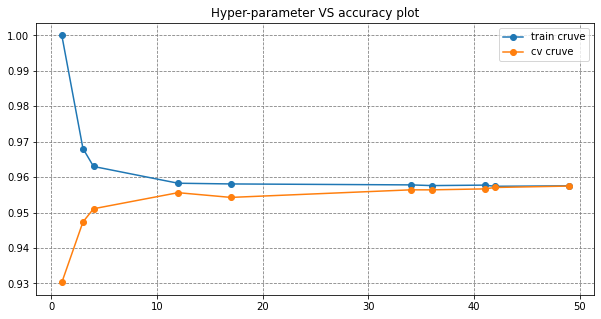

In [27]:
# plotting the parameters vs accuracy plot

fig = plt.figure(figsize=(10,5))
plt.plot(params['n_neighbors'],trainscores, label='train cruve', marker='o')
plt.plot(params['n_neighbors'],cvscores, label='cv cruve', marker='o')
plt.title('Hyper-parameter VS accuracy plot')
# plt.minorticks_on()
plt.grid(color = 'grey', linestyle = '--')
plt.legend()
plt.show()

In [21]:
def bestCV(neighbors, cvscores, trainscores):
  '''
   finds best k-values
  '''
  cv = {k: v for k,v in zip(neighbors[0], cvscores)}
  train = {k: v for k,v in zip(neighbors[0], trainscores)}
  cv = dict(sorted(cv.items(), key=lambda x:x[1], reverse=True))
  bestcv =  list(cv.keys())
  
  diff = {}
  for k in neighbors[0]:
    diff[k] = train[k] - cv[k]
  diffk = dict(sorted(diff.items(), key=lambda x:x[1]))
  bestK = list(diffk.keys())

  return bestcv[:len(neighbors[0])//3], bestK[:1][0]

In [28]:
# Finding best parameter 
print('for k-values : ',neighbors)
bestcv, bestK = bestCV(neighbors, cvscores, trainscores)
print('Peak values for cv accuracy seen for k-values(descending order) :', bestcv)
print('Distance between train and cv is minimum at k =', bestK)

for k-values :  [[1, 3, 4, 12, 17, 34, 36, 41, 42, 49]]
Peak values for cv accuracy seen for k-values(descending order) : [49, 42, 41]
Distance between train and cv is minimum at k = 49


In [24]:
# understanding this code line by line is not that important 
def plot_decision_boundary(X1, X2, y, clf):
    '''
    plotting decision boundary
    '''
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10,5))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

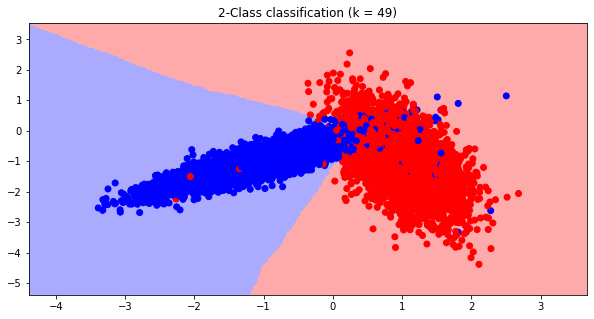

In [29]:
# Plotting decision boundary
from matplotlib.colors import ListedColormap

classifier = KNeighborsClassifier(n_neighbors = bestK)
classifier.fit(X_train, Y_train)

plot_decision_boundary(X_train[:, 0], X_train[:, 1], Y_train, classifier)